# Importamos librerías

In [1]:
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

# Importamos los datos

In [4]:
path = 'D:/Documentos de trabajo/Maestría/Tesis Maestría/Trabajo Python Tesis/Github Tesis/Base de datos'

## Datos de entrenamiento

### Datos

In [5]:
varftrain = np.load(path + '/varftrain.npy')

In [6]:
np.shape(varftrain)

(7000, 10, 2, 200)

### Coeficientes

In [7]:
coefvarftrain = np.load(path + '/coefvarftrain.npy')

In [8]:
np.shape(coefvarftrain)

(7000, 7)

## Datos de prueba

### Datos

In [9]:
varftest = np.load(path + '/varftest.npy')

In [10]:
np.shape(varftest)

(2000, 10, 2, 200)

### Coeficientes

In [11]:
coefvarftest = np.load(path + '/coefvarftest.npy')

In [12]:
np.shape(coefvarftest)

(2000, 7)

## Datos de validación

### Datos

In [13]:
varfval = np.load(path + '/varfval.npy')

In [14]:
np.shape(varfval)

(1000, 10, 2, 200)

### Coeficienes

In [15]:
coefvarfval = np.load(path + '/coefvarfval.npy')

In [16]:
np.shape(coefvarfval)

(1000, 7)

# Unimos coeficientes con los datos

In [17]:
train_dataset = tf.data.Dataset.from_tensor_slices((varftrain, coefvarftrain))
test_dataset = tf.data.Dataset.from_tensor_slices((varftest, coefvarftest))
val_dataset = tf.data.Dataset.from_tensor_slices((varfval, coefvarfval))

In [18]:
train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(10, 2, 200), dtype=tf.float64, name=None), TensorSpec(shape=(7,), dtype=tf.int32, name=None))>

# Mezclar y procesar por lotes los conjuntos de datos

In [19]:
BATCH_SIZE = 100
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)

# Creamos la función de costo

# Creación del modelo

In [ ]:
def custom_loss(y_true,y_pred):
    ytruearray = ytrue.eval(session=tf.compat.v1.Session())
    print(np.shape(y_true))
    campvec = []
    # constantes
    a1 = y_true[0]
    a2 = y_true[1]
    b1 = y_true[2]
    b2 = y_true[3]
    d1 = y_true[4]
    d2 = y_true[5]
    n = y_true[6]

    def f(t, y):

        # asignar a cada ODE a un elemento de vector
        X = y[0]
        Y = y[1]

        # definimos cada ODE
        # dX_dt=a1/(1+Y**n)-d1*X+b1
        # dY_dt=a2/(1+X**n)-d2*Y+b2
        dX_dt = a1/(1+Y**n)-d1*X+b1
        dY_dt = a2/(1+X**n)-d2*Y+b1

        return [dX_dt, dY_dt]

    x_range_neg = 0
    x_range_pos = 50
    y_range_neg = 0
    y_range_pos =50

    y1 = np.linspace(x_range_neg, x_range_pos, 100)
    y2 = np.linspace(y_range_neg, y_range_pos, 100)

    Y1, Y2 = np.meshgrid(y1, y2)
    
    t1 = 0

    u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

    NI, NJ = Y1.shape

    u1, v1 = f(t1, [Y1, Y2])
    u, v = f(t1, [Y1, Y2])
    M = (np.hypot(u, v))
    u /= M
    v /= M

    campvecci = np.append([u1], [v1], axis=0)

    campvec = campvecci
    campvec = np.array(campvec)

# ----------------------------------------------------------------------------
    campvec2 = []
    # constantes
    a12 = y_pred[0]
    a22 = y_pred[1]
    b12 = y_pred[2]
    b22 = y_pred[3]
    d12 = y_pred[4]
    d22 = y_pred[5]
    n2 = y_pred[6]

    def f2(t2, y2):

        # asignar a cada ODE a un elemento de vector
        X2 = y2[0]
        Y2 = y2[1]

        # definimos cada ODE
        # dX_dt=a1/(1+Y**n)-d1*X+b1
        # dY_dt=a2/(1+X**n)-d2*Y+b2
        dX2_dt = a12/(1+Y**n2)-d12*X+b12
        dY2_dt = a22/(1+X**n2)-d22*Y+b12

        return [dX2_dt, dY2_dt]

    y12 = np.linspace(x_range_neg, x_range_pos, 100)
    y22 = np.linspace(y_range_neg, y_range_pos, 100)

    Y12, Y22 = np.meshgrid(y12, y22)
    
    t12 = 0

    u2, v2 = np.zeros(Y12.shape), np.zeros(Y22.shape)

    NI2, NJ2 = Y12.shape

    u12, v12 = f(t12, [Y12, Y22])
    u2, v2 = f(t12, [Y12, Y22])
    M2 = (np.hypot(u2, v2))
    u2 /= M2
    v2 /= M2

    campvecci2 = np.append([u12], [v12], axis=0)

    campvec2 = campvecci2
    campvec2 = np.array(campvec2)
    tf.cast(campvec|campvec2, tf.int64|tf.int64)

    
    return (campvec-campvec2)


In [20]:
#model = Sequential()

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(10,2,200)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(7)
])


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4000)              0         
                                                                 
 batch_normalization (BatchN  (None, 4000)             16000     
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 128)               512128    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                        

# Entrenamos el modelo

In [22]:
model.compile(optimizer='adam',
              loss='MSE',
              metrics=['accuracy'])

In [23]:
def scheduler(epoch, lr):
  if epoch < 500:
    return lr
  else:
    return 1e-3 * 0.99 ** epoch

In [24]:
val_epochs = 10000
tf.compat.v1.global_variables_initializer()

early_stop = tf.keras.callbacks.EarlyStopping( monitor = 'val_loss', patience = 500,verbose = 1, 
                                              restore_best_weights = True)

reduce_lr = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(train_dataset, validation_data=val_dataset, epochs= val_epochs, callbacks=[reduce_lr, early_stop])

Epoch 1/10000
70/70 [==============================] - 1s 9ms/step - loss: 28.4272 - accuracy: 0.2421 - val_loss: 26.2660 - val_accuracy: 0.2950 - lr: 0.0010
Epoch 2/10000
70/70 [==============================] - 1s 7ms/step - loss: 21.2525 - accuracy: 0.2887 - val_loss: 17.1735 - val_accuracy: 0.3190 - lr: 0.0010
Epoch 3/10000
70/70 [==============================] - 1s 7ms/step - loss: 11.9289 - accuracy: 0.3069 - val_loss: 8.3094 - val_accuracy: 0.2620 - lr: 0.0010
Epoch 4/10000
70/70 [==============================] - 1s 7ms/step - loss: 7.6341 - accuracy: 0.3013 - val_loss: 7.3650 - val_accuracy: 0.3170 - lr: 0.0010
Epoch 5/10000
70/70 [==============================] - 0s 7ms/step - loss: 6.9256 - accuracy: 0.3101 - val_loss: 6.6744 - val_accuracy: 0.3700 - lr: 0.0010
Epoch 6/10000
70/70 [==============================] - 1s 7ms/step - loss: 6.7939 - accuracy: 0.3191 - val_loss: 8.4152 - val_accuracy: 0.3490 - lr: 0.0010
Epoch 7/10000
70/70 [==============================] - 1s 7

70/70 [==============================] - 0s 7ms/step - loss: 4.6817 - accuracy: 0.4579 - val_loss: 4.4959 - val_accuracy: 0.4690 - lr: 0.0010
Epoch 106/10000
70/70 [==============================] - 0s 7ms/step - loss: 4.6101 - accuracy: 0.4650 - val_loss: 4.6071 - val_accuracy: 0.4770 - lr: 0.0010
Epoch 107/10000
70/70 [==============================] - 0s 7ms/step - loss: 4.6157 - accuracy: 0.4699 - val_loss: 4.5506 - val_accuracy: 0.4860 - lr: 0.0010
Epoch 108/10000
70/70 [==============================] - 0s 7ms/step - loss: 4.7256 - accuracy: 0.4520 - val_loss: 4.5656 - val_accuracy: 0.4730 - lr: 0.0010
Epoch 109/10000
70/70 [==============================] - 0s 7ms/step - loss: 4.7056 - accuracy: 0.4550 - val_loss: 4.7043 - val_accuracy: 0.4760 - lr: 0.0010
Epoch 110/10000
70/70 [==============================] - 0s 7ms/step - loss: 4.7654 - accuracy: 0.4537 - val_loss: 4.5573 - val_accuracy: 0.4740 - lr: 0.0010
Epoch 111/10000
70/70 [==============================] - 0s 7ms/step

Epoch 157/10000
70/70 [==============================] - 0s 7ms/step - loss: 4.4391 - accuracy: 0.4786 - val_loss: 4.6049 - val_accuracy: 0.4840 - lr: 0.0010
Epoch 158/10000
70/70 [==============================] - 0s 6ms/step - loss: 4.3998 - accuracy: 0.4817 - val_loss: 4.5267 - val_accuracy: 0.4780 - lr: 0.0010
Epoch 159/10000
70/70 [==============================] - 0s 7ms/step - loss: 4.4635 - accuracy: 0.4676 - val_loss: 4.5749 - val_accuracy: 0.4760 - lr: 0.0010
Epoch 160/10000
70/70 [==============================] - 0s 7ms/step - loss: 4.4176 - accuracy: 0.4771 - val_loss: 4.5151 - val_accuracy: 0.4900 - lr: 0.0010
Epoch 161/10000
70/70 [==============================] - 0s 7ms/step - loss: 4.4236 - accuracy: 0.4850 - val_loss: 4.6674 - val_accuracy: 0.4750 - lr: 0.0010
Epoch 162/10000
70/70 [==============================] - 0s 7ms/step - loss: 4.4000 - accuracy: 0.4827 - val_loss: 4.5935 - val_accuracy: 0.4790 - lr: 0.0010
Epoch 163/10000
70/70 [=============================

Epoch 209/10000
70/70 [==============================] - 0s 7ms/step - loss: 4.1932 - accuracy: 0.4907 - val_loss: 4.5129 - val_accuracy: 0.4750 - lr: 0.0010
Epoch 210/10000
70/70 [==============================] - 0s 7ms/step - loss: 4.1656 - accuracy: 0.4907 - val_loss: 4.7051 - val_accuracy: 0.4850 - lr: 0.0010
Epoch 211/10000
70/70 [==============================] - 0s 7ms/step - loss: 4.1208 - accuracy: 0.5060 - val_loss: 4.7663 - val_accuracy: 0.4770 - lr: 0.0010
Epoch 212/10000
70/70 [==============================] - 0s 7ms/step - loss: 4.1220 - accuracy: 0.4976 - val_loss: 4.7289 - val_accuracy: 0.4730 - lr: 0.0010
Epoch 213/10000
70/70 [==============================] - 0s 7ms/step - loss: 4.2121 - accuracy: 0.4891 - val_loss: 4.8355 - val_accuracy: 0.4770 - lr: 0.0010
Epoch 214/10000
70/70 [==============================] - 0s 7ms/step - loss: 4.2292 - accuracy: 0.4914 - val_loss: 4.6765 - val_accuracy: 0.4940 - lr: 0.0010
Epoch 215/10000
70/70 [=============================

Epoch 261/10000
70/70 [==============================] - 0s 7ms/step - loss: 3.8737 - accuracy: 0.5159 - val_loss: 4.7679 - val_accuracy: 0.4940 - lr: 0.0010
Epoch 262/10000
70/70 [==============================] - 0s 7ms/step - loss: 3.9281 - accuracy: 0.5097 - val_loss: 4.7719 - val_accuracy: 0.4730 - lr: 0.0010
Epoch 263/10000
70/70 [==============================] - 1s 7ms/step - loss: 3.8924 - accuracy: 0.5176 - val_loss: 4.7744 - val_accuracy: 0.4800 - lr: 0.0010
Epoch 264/10000
70/70 [==============================] - 0s 7ms/step - loss: 3.8479 - accuracy: 0.5174 - val_loss: 4.8318 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 265/10000
70/70 [==============================] - 1s 7ms/step - loss: 3.8955 - accuracy: 0.5209 - val_loss: 4.8698 - val_accuracy: 0.4830 - lr: 0.0010
Epoch 266/10000
70/70 [==============================] - 0s 7ms/step - loss: 3.8660 - accuracy: 0.5137 - val_loss: 4.8139 - val_accuracy: 0.4670 - lr: 0.0010
Epoch 267/10000
70/70 [=============================

Epoch 313/10000
70/70 [==============================] - 0s 7ms/step - loss: 3.6119 - accuracy: 0.5326 - val_loss: 5.1748 - val_accuracy: 0.4510 - lr: 0.0010
Epoch 314/10000
70/70 [==============================] - 0s 7ms/step - loss: 3.6236 - accuracy: 0.5323 - val_loss: 5.0173 - val_accuracy: 0.4610 - lr: 0.0010
Epoch 315/10000
70/70 [==============================] - 0s 7ms/step - loss: 3.6373 - accuracy: 0.5369 - val_loss: 4.9895 - val_accuracy: 0.4540 - lr: 0.0010
Epoch 316/10000
70/70 [==============================] - 0s 7ms/step - loss: 3.6037 - accuracy: 0.5387 - val_loss: 5.0128 - val_accuracy: 0.4740 - lr: 0.0010
Epoch 317/10000
70/70 [==============================] - 0s 7ms/step - loss: 3.6035 - accuracy: 0.5344 - val_loss: 5.0686 - val_accuracy: 0.4470 - lr: 0.0010
Epoch 318/10000
70/70 [==============================] - 0s 7ms/step - loss: 3.6550 - accuracy: 0.5296 - val_loss: 5.0269 - val_accuracy: 0.4480 - lr: 0.0010
Epoch 319/10000
70/70 [=============================

Epoch 365/10000
70/70 [==============================] - 0s 7ms/step - loss: 3.3689 - accuracy: 0.5539 - val_loss: 5.3185 - val_accuracy: 0.4190 - lr: 0.0010
Epoch 366/10000
70/70 [==============================] - 1s 7ms/step - loss: 3.3663 - accuracy: 0.5479 - val_loss: 5.1952 - val_accuracy: 0.4390 - lr: 0.0010
Epoch 367/10000
70/70 [==============================] - 1s 8ms/step - loss: 3.3768 - accuracy: 0.5484 - val_loss: 5.2059 - val_accuracy: 0.4450 - lr: 0.0010
Epoch 368/10000
70/70 [==============================] - 1s 8ms/step - loss: 3.4005 - accuracy: 0.5437 - val_loss: 5.2264 - val_accuracy: 0.4420 - lr: 0.0010
Epoch 369/10000
70/70 [==============================] - 1s 8ms/step - loss: 3.4146 - accuracy: 0.5414 - val_loss: 5.2639 - val_accuracy: 0.4680 - lr: 0.0010
Epoch 370/10000
70/70 [==============================] - 1s 8ms/step - loss: 3.3147 - accuracy: 0.5497 - val_loss: 5.2141 - val_accuracy: 0.4360 - lr: 0.0010
Epoch 371/10000
70/70 [=============================

Epoch 417/10000
70/70 [==============================] - 0s 6ms/step - loss: 3.2323 - accuracy: 0.5577 - val_loss: 5.3143 - val_accuracy: 0.4310 - lr: 0.0010
Epoch 418/10000
70/70 [==============================] - 0s 7ms/step - loss: 3.1844 - accuracy: 0.5597 - val_loss: 5.3444 - val_accuracy: 0.4290 - lr: 0.0010
Epoch 419/10000
70/70 [==============================] - 0s 7ms/step - loss: 3.1773 - accuracy: 0.5580 - val_loss: 5.3786 - val_accuracy: 0.4280 - lr: 0.0010
Epoch 420/10000
70/70 [==============================] - 0s 7ms/step - loss: 3.2385 - accuracy: 0.5526 - val_loss: 5.4057 - val_accuracy: 0.4240 - lr: 0.0010
Epoch 421/10000
70/70 [==============================] - 0s 7ms/step - loss: 3.1963 - accuracy: 0.5563 - val_loss: 5.4229 - val_accuracy: 0.4230 - lr: 0.0010
Epoch 422/10000
70/70 [==============================] - 0s 7ms/step - loss: 3.2135 - accuracy: 0.5620 - val_loss: 5.3358 - val_accuracy: 0.4440 - lr: 0.0010
Epoch 423/10000
70/70 [=============================

Epoch 469/10000
70/70 [==============================] - 0s 7ms/step - loss: 3.0177 - accuracy: 0.5729 - val_loss: 5.4760 - val_accuracy: 0.4320 - lr: 0.0010
Epoch 470/10000
70/70 [==============================] - 0s 7ms/step - loss: 3.0346 - accuracy: 0.5739 - val_loss: 5.6160 - val_accuracy: 0.4370 - lr: 0.0010
Epoch 471/10000
70/70 [==============================] - 1s 7ms/step - loss: 3.0235 - accuracy: 0.5687 - val_loss: 5.4285 - val_accuracy: 0.4280 - lr: 0.0010
Epoch 472/10000
70/70 [==============================] - 0s 7ms/step - loss: 3.0408 - accuracy: 0.5691 - val_loss: 5.5857 - val_accuracy: 0.4170 - lr: 0.0010
Epoch 473/10000
70/70 [==============================] - 0s 7ms/step - loss: 3.0095 - accuracy: 0.5661 - val_loss: 5.5653 - val_accuracy: 0.4370 - lr: 0.0010
Epoch 474/10000
70/70 [==============================] - 0s 7ms/step - loss: 3.0747 - accuracy: 0.5637 - val_loss: 5.6021 - val_accuracy: 0.4240 - lr: 0.0010
Epoch 475/10000
70/70 [=============================

Epoch 571/10000
70/70 [==============================] - 0s 7ms/step - loss: 2.7743 - accuracy: 0.5923 - val_loss: 5.4726 - val_accuracy: 0.4410 - lr: 3.2513e-06
Epoch 572/10000
70/70 [==============================] - 0s 7ms/step - loss: 2.7696 - accuracy: 0.5861 - val_loss: 5.4708 - val_accuracy: 0.4440 - lr: 3.2188e-06
Epoch 573/10000
70/70 [==============================] - 0s 7ms/step - loss: 2.8089 - accuracy: 0.5853 - val_loss: 5.4703 - val_accuracy: 0.4450 - lr: 3.1866e-06
Epoch 574/10000
70/70 [==============================] - 0s 7ms/step - loss: 2.7962 - accuracy: 0.5820 - val_loss: 5.4736 - val_accuracy: 0.4420 - lr: 3.1548e-06
Epoch 575/10000
70/70 [==============================] - 0s 7ms/step - loss: 2.7817 - accuracy: 0.5896 - val_loss: 5.4741 - val_accuracy: 0.4430 - lr: 3.1232e-06
Epoch 576/10000
70/70 [==============================] - 0s 7ms/step - loss: 2.7916 - accuracy: 0.5869 - val_loss: 5.4738 - val_accuracy: 0.4430 - lr: 3.0920e-06
Epoch 577/10000
70/70 [=====

# Analizamos accuracy y loss

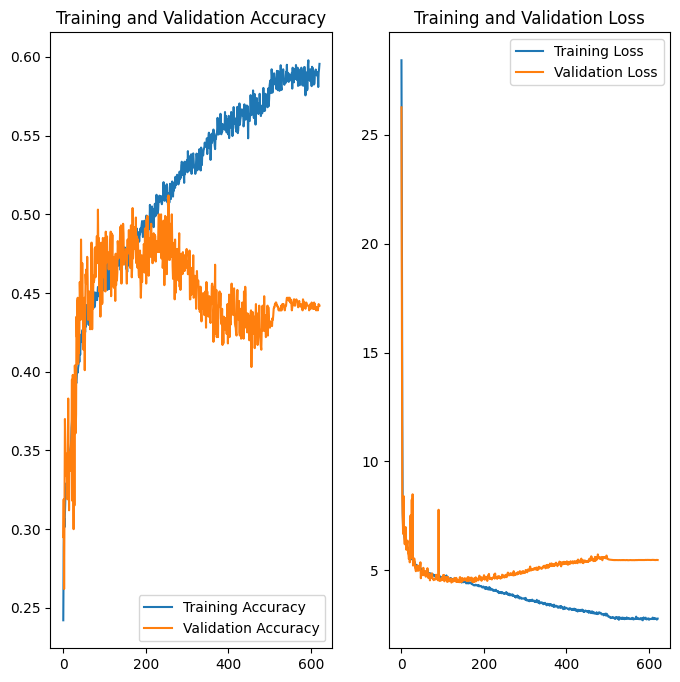

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(622)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Guardamos el modelo

In [26]:
path_to_save = 'D:/Documentos de trabajo/Maestría/Tesis Maestría/Trabajo Python Tesis/Github Tesis/Modelos'

In [27]:
model.save(path_to_save + '/trayectorias.h5')

# Importamos el modelo

In [28]:
new_model = keras.models.load_model('../Modelos/trayectorias.h5')

# Probamos el modelo con datos nuevos

## Creamos nuevos datos

In [42]:
import random
from scipy.integrate import solve_ivp

varf = []
coef = []
contador = 0
for i in range(0, 1):
    # constantes
    a1 = random.randint(0, 10)
    a2 = random.randint(0, 10)
    b1 = random.randint(0, 10)
    b2 = random.randint(0, 10)
    d1 = random.randint(0, 10)
    d2 = random.randint(0, 10)
    n = random.randint(0, 5)

    coef1 = [a1, a2, b1, b2, d1, d2, n]
    coef.append(coef1)

    def f(t, y):

        # asignar a cada ODE a un elemento de vector
        X = y[0]
        Y = y[1]

        # definimos cada ODE
        # dX_dt=a1/(1+Y**n)-d1*X+b1
        # dY_dt=a2/(1+X**n)-d2*Y+b2
        dX_dt = a1/(1+Y**n)-d1*X+b1
        dY_dt = a2/(1+X**n)-d2*Y+b1

        return [dX_dt, dY_dt]

    # Declaramos el vector de tiempo
    t_span = [0, 100]
    times = np.linspace(t_span[0], t_span[1], 200)

    varfci2 = []
    for i_ci in range(0, 10):
        # Definimos las condiciones iniciales
        y0 = np.array([random.randint(0, 10), random.randint(0, 10)])

        # Resolvemos
        # Modificar manualmente el intervalo de tiempo
        sol = solve_ivp(f, t_span, y0, t_eval=times)
        # sol=solve_ivp(f, t_span, y0) #Dejar que la librería elija el mejor intervalo
        tiempo = sol.t
        var1 = sol.y[0]
        var2 = sol.y[1]

        varfci = np.append([var1], [var2], axis=0)
        varfci2.append(varfci)

       

    varf= varfci2
    print('--------------------------------------------')
    print(coef1)
    print(np.shape(varf))
    contador = contador+1
    print(contador)

varf = np.array(varf)
coef = np.array(coef)

--------------------------------------------
[8, 8, 8, 4, 4, 2, 1]
(10, 2, 200)
1


In [43]:
varfnone = varf[None, :]

## Predecimos con los datos nuevos

In [44]:
new_predictions = new_model.predict(varfnone)
print(new_predictions)

1/1 [==============================] - 0s 12ms/step
[[5.9029236 5.80999   8.787837  5.1264358 4.2194896 2.5669987 2.2727773]]


## Graficamos con los coeficientes reales

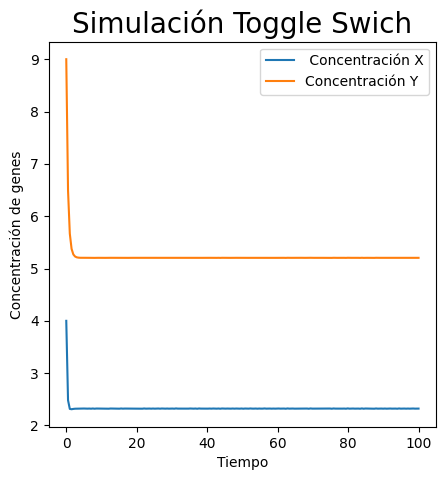

In [45]:
t_span = [0, 100]
times = np.linspace(t_span[0], t_span[1], 200)
plt.figure(figsize=(5,5))
plt.plot(times,np.array(varf)[0,0,:], label=" Concentración X")
plt.plot(times,np.array(varf)[0,1,:], label="Concentración Y")
plt.xlabel('Tiempo')
plt.ylabel('Concentración de genes')
plt.title('Simulación Toggle Swich', fontsize=20)
plt.legend()
plt.show()

In [46]:
np.shape(new_predictions)

(1, 7)

## Graficamos con los coeficientes predecidos

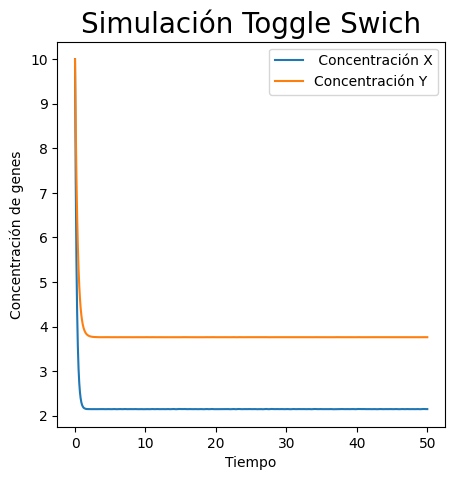

In [47]:
a1 = new_predictions[0,0]
a2 = new_predictions[0,1]
b1 = new_predictions[0,2]
b2 = new_predictions[0,3]
d1 = new_predictions[0,4]
d2 = new_predictions[0,5]
n = new_predictions[0,6]
 
def f(t, y):

    # asignar a cada ODE a un elemento de vector
    X = y[0]
    Y = y[1]

    # definimos cada ODE
    dX_dt = a1/(1+Y**n)-d1*X+b1
    dY_dt = a2/(1+X**n)-d2*Y+b1

    return [dX_dt, dY_dt]

# Declaramos el vector de tiempo
t_span = [0, 50]
times = np.linspace(t_span[0], t_span[1], 500)

# Definimos las condiciones iniciales
y0 = np.array([10,10])

# Resolvemos
# Modificar manualmente el intervalo de tiempo
sol = solve_ivp(f, t_span, y0, t_eval=times)
# sol=solve_ivp(f, t_span, y0) #Dejar que la librería elija el mejor intervalo
tiempo = sol.t
var1 = sol.y[0]
var2 = sol.y[1]

# Graficamos
plt.figure(figsize=(5, 5))
plt.plot(tiempo, var1, label=" Concentración X")
plt.plot(tiempo, var2, label="Concentración Y")
plt.xlabel('Tiempo')
plt.ylabel('Concentración de genes')
plt.title('Simulación Toggle Swich', fontsize=20)
plt.legend()
plt.show()

In [ ]:
class InverseProblemSODE(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
    @property
    def metrics(self):
        return [self.loss_tracker]

    def train_step(self, data):
        batch_size=tf.shape(data)[0]
        x=tf.random.uniform((batch_size,1),minval=-5,maxval=5)
    
        with tf.GradientTape() as tape: 
            #Compute the loss value
            with tf.GradientTape() as tape2: 
                tape2.watch(x)
                y_pred = self(x, training=True)
            dy = tape2.gradient(y_pred, x)
            x_o = tf.zeros((batch_size, 1))
            y_o = self(x_o, training = True)
            eq = x*dy + y_pred-x**2*tf.cos(x)
            ic = y_o
            loss = keras.losses.mean_squared_error(0., eq) + keras.losses.mean_absolute_error(0., ic)
        # Apply grads
        grads = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        # Update metrics
        self.loss_tracker.update_state(loss)
        # Return a dict mapping metric names to current value
        return {"loss": self.loss_tracker.result()}